Data Analysis

Import the necessary libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the cleaned data

In [89]:
df = pd.read_csv("seria_cleaned.csv")

Question 1: Which player has the highest ratio of successful dribbles to dribble attempts among those who have attempted at least 50 dribbles?

In [90]:
# Filter for players with at least 50 dribble attempts
dribblers = df[df['dribble_attempts'] >= 50].copy()
# Calculate the dribble success ratio
dribblers['dribble_success_ratio'] = dribblers['successful_dribbles'] / dribblers['dribble_attempts']
# Find the player with the highest ratio
#best_dribbler = dribblers.sort_values(by='dribble_success_ratio', ascending=False).iloc[0]
#print(f"The player with the highest successful dribble ratio (attempting >= 50 dribbles) is {best_dribbler['player']} from {best_dribbler['team']} with a ratio of {best_dribbler['dribble_success_ratio']:.2f}.")

Question 2: Can you identify the top 5 players with the most goal-creating actions relative to their total minutes played?

In [91]:
# Calculate goal-creating actions per minute
df["gca_per_minute"] = df["goal_creating_actions"] / df["minutes"]
# Handle potential division by zero
df["gca_per_minute"] = df["gca_per_minute"].fillna(0)
# Get the top 5 players, ensuring we sort the non-zero minutes played
top_5_gca = df[df["minutes"] > 0].sort_values(by="gca_per_minute",ascending=False).head(5)
print("Top 5 players with the most goal-creating actions relative to minutes played")
print(top_5_gca[["player","team","minutes","goal_creating_actions","gca_per_minute"]].to_string(index=False))

Top 5 players with the most goal-creating actions relative to minutes played
           player          team  minutes  goal_creating_actions  gca_per_minute
      David Neres        Napoli        3                      2        0.666667
 Mathis Lambourde Hellas Verona        3                      1        0.333333
   Manuel Lazzari         Lazio        4                      1        0.250000
  Luca Mazzitelli          Como        6                      1        0.166667
Dailon Livramento Hellas Verona       13                      2        0.153846


What is the average age of players who have scored at least 5 goals, and how does this compare to the average age of players who have not scored any goals

Average age of players with at least 5 goals: nan years
Average age of players with 0 goals: 26.11 years
Players who have scored at least 5 goals are, on average, younger by nan years


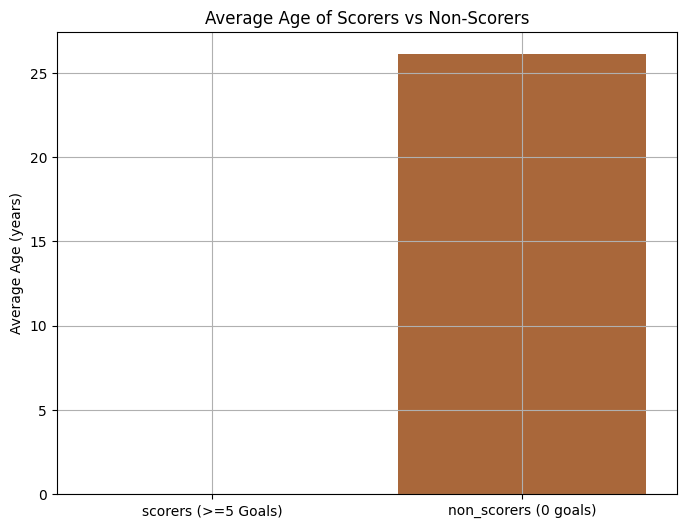

In [92]:
# Group players by goals scored
scorers = df[df["goals"] > 5]
non_scorers = df[df["goals"] == 0]
# Calculate the average age of each group 
avg_age_scorers = scorers["age"].mean()
avg_age_non_scorers = non_scorers["age"].mean()
print(f"Average age of players with at least 5 goals: {avg_age_scorers:.2f} years")
print(f"Average age of players with 0 goals: {avg_age_non_scorers:.2f} years")
print(f"Players who have scored at least 5 goals are, on average, {"older" if avg_age_scorers > avg_age_non_scorers else "younger"} by {abs(avg_age_scorers - avg_age_non_scorers):.2f} years")

# Create a bar chart for the age comparison
plt.figure(figsize=(8,6))
sns.barplot(x = ["scorers (>=5 Goals)","non_scorers (0 goals)"], y = [avg_age_scorers,avg_age_non_scorers],color="#BB6328")
plt.title("Average Age of Scorers vs Non-Scorers")
plt.ylabel("Average Age (years)")
plt.grid()
plt.show()